In [21]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library
import requests 

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library
from datetime import datetime

In [23]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-71.90598394857705, -95.9270945377383),
 (-87.11236450199316, -3.8833596408605047),
 (89.20204395504854, 150.7896910413363),
 (-87.88451992121023, -60.427017184775664),
 (-59.75007431486147, -27.907790859463603),
 (3.6799320995393714, 95.5441493158188),
 (31.355081436276038, 163.82500057146126),
 (42.1022772218534, -35.450175158629065),
 (62.45808631822075, 138.05463767048894),
 (75.96866780273777, 131.24279761164178),
 (-16.377364314150157, -99.61746850166291),
 (-49.44607856067557, 111.88375392575472),
 (3.261050418827381, 90.08490661706571),
 (43.128659013600014, -53.84547036530246),
 (9.261917739093406, -146.07387669330234),
 (36.24031354931472, 82.30798053387053),
 (21.469433373871354, 110.02947411268605),
 (66.02611349457854, -100.97819404520772),
 (68.23456707185687, -167.37242875334422),
 (24.91875763457587, -178.24183886850284),
 (37.25928424493168, 123.88206023049645),
 (89.08160889530592, -50.25541000734904),
 (26.227011600503587, 44.7501201564171),
 (-51.16548387133692, -

In [25]:
# Use the citipy module to determine city based on latitude and longitude 
from citipy import citipy

In [26]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

613

In [28]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try: 
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard 
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity, 
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind, 
                          "Country": city_country, 
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | solnechnyy
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | banda aceh
Processing Record 14 of Set 1 | marystown
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | leh
Processing Record 17 of Set 1 | suicheng
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | nome
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | yatou
Processing Record 22 of Set 1 | upernavik
Processing Record 23

Processing Record 35 of Set 3 | saleaula
City not found. Skipping...
Processing Record 36 of Set 3 | los llanos de aridane
Processing Record 37 of Set 3 | kijang
Processing Record 38 of Set 3 | amderma
City not found. Skipping...
Processing Record 39 of Set 3 | antofagasta
Processing Record 40 of Set 3 | teguise
Processing Record 41 of Set 3 | altamira
Processing Record 42 of Set 3 | arona
Processing Record 43 of Set 3 | maniitsoq
Processing Record 44 of Set 3 | ulaangom
Processing Record 45 of Set 3 | nhulunbuy
Processing Record 46 of Set 3 | odweyne
Processing Record 47 of Set 3 | kuche
City not found. Skipping...
Processing Record 48 of Set 3 | ginir
Processing Record 49 of Set 3 | saldanha
Processing Record 50 of Set 3 | padang
Processing Record 1 of Set 4 | dandong
Processing Record 2 of Set 4 | korla
Processing Record 3 of Set 4 | arman
Processing Record 4 of Set 4 | mwene-ditu
Processing Record 5 of Set 4 | samusu
City not found. Skipping...
Processing Record 6 of Set 4 | sept-i

Processing Record 26 of Set 7 | winnemucca
Processing Record 27 of Set 7 | rohru
Processing Record 28 of Set 7 | ubinskoye
Processing Record 29 of Set 7 | asosa
Processing Record 30 of Set 7 | uppsala
Processing Record 31 of Set 7 | puerto madryn
Processing Record 32 of Set 7 | denpasar
Processing Record 33 of Set 7 | kirakira
Processing Record 34 of Set 7 | gladstone
Processing Record 35 of Set 7 | oussouye
Processing Record 36 of Set 7 | zharkent
Processing Record 37 of Set 7 | lazaro cardenas
Processing Record 38 of Set 7 | victoria
Processing Record 39 of Set 7 | fatezh
Processing Record 40 of Set 7 | miyako
Processing Record 41 of Set 7 | kuching
Processing Record 42 of Set 7 | comodoro rivadavia
Processing Record 43 of Set 7 | yar-sale
Processing Record 44 of Set 7 | ijaki
City not found. Skipping...
Processing Record 45 of Set 7 | grass valley
Processing Record 46 of Set 7 | mazagao
Processing Record 47 of Set 7 | kahului
Processing Record 48 of Set 7 | we
City not found. Skippi

Processing Record 16 of Set 11 | sitka
Processing Record 17 of Set 11 | pak phanang
Processing Record 18 of Set 11 | chistogorskiy
Processing Record 19 of Set 11 | belomorsk
Processing Record 20 of Set 11 | kaspiyskiy
Processing Record 21 of Set 11 | aripuana
Processing Record 22 of Set 11 | rach gia
Processing Record 23 of Set 11 | udankudi
Processing Record 24 of Set 11 | krasnyy chikoy
Processing Record 25 of Set 11 | zheleznodorozhnyy
Processing Record 26 of Set 11 | tabiauea
City not found. Skipping...
Processing Record 27 of Set 11 | luanda
Processing Record 28 of Set 11 | nuevo progreso
Processing Record 29 of Set 11 | namibe
Processing Record 30 of Set 11 | tommot
Processing Record 31 of Set 11 | port hedland
Processing Record 32 of Set 11 | suzu
City not found. Skipping...
Processing Record 33 of Set 11 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 11 | jam sahib
Processing Record 35 of Set 11 | keti bandar
Processing Record 36 of Set 11 | ca

In [29]:
len(city_data)

565

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,53.71,66,75,21.85,CL,2021-09-21 03:43:55
1,Hermanus,-34.4187,19.2345,50.85,69,80,9.51,ZA,2021-09-21 03:43:55
2,Chokurdakh,70.6333,147.9167,35.22,48,98,10.16,RU,2021-09-21 03:43:56
3,Ushuaia,-54.8000,-68.3000,44.26,81,75,12.66,AR,2021-09-21 03:43:56
4,Chuy,-33.6971,-53.4616,53.76,86,90,17.49,UY,2021-09-21 03:43:57
5,Meulaboh,4.1363,96.1285,83.64,67,99,1.28,ID,2021-09-21 03:43:57
6,Ribeira Grande,38.5167,-28.7000,70.72,75,4,11.18,PT,2021-09-21 03:43:57
7,Solnechnyy,50.7214,136.6319,63.37,46,87,3.94,RU,2021-09-21 03:43:58
8,Tiksi,71.6872,128.8694,38.05,68,100,11.83,RU,2021-09-21 03:43:54
9,Puerto Ayora,-0.7393,-90.3518,67.86,84,41,8.03,EC,2021-09-21 03:43:21


In [34]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-09-21 03:43:55,-53.1500,-70.9167,53.71,66,75,21.85
1,Hermanus,ZA,2021-09-21 03:43:55,-34.4187,19.2345,50.85,69,80,9.51
2,Chokurdakh,RU,2021-09-21 03:43:56,70.6333,147.9167,35.22,48,98,10.16
3,Ushuaia,AR,2021-09-21 03:43:56,-54.8000,-68.3000,44.26,81,75,12.66
4,Chuy,UY,2021-09-21 03:43:57,-33.6971,-53.4616,53.76,86,90,17.49
...,...,...,...,...,...,...,...,...,...
560,Apan,MX,2021-09-21 03:47:24,19.7167,-98.4167,52.63,88,38,2.04
561,Itarema,BR,2021-09-21 03:45:41,-2.9248,-39.9167,78.30,79,72,15.88
562,Saraland,US,2021-09-21 03:47:24,30.8207,-88.0706,78.82,87,0,3.00
563,Tarakan,ID,2021-09-21 03:47:25,3.3000,117.6333,85.50,79,40,4.61


In [35]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

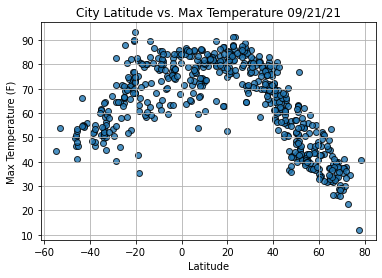

In [37]:
# Import time module
import time 

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

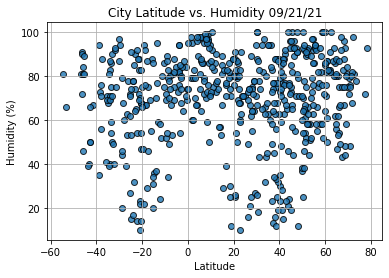

In [38]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

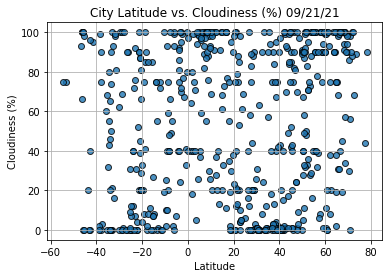

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

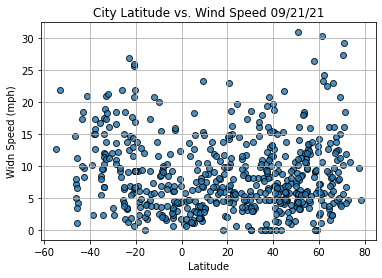

In [40]:
# Build the scatter plots for latitude vs. humidity 
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Widn Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()